## Word Embedding using Word2Vec

### 1. Importing libraries and data

In [6]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
#Gensim is an open-source library for unsupervised topic modeling and natural language processing,
#using modern statistical machine learning.

In [7]:
#Dataset obtained from airbnb open data site >> http://insideairbnb.com/get-the-data.html, detailed review for NYC
review_df = pd.read_csv('Dataset/reviews.csv')

### 2. Viewing dataset

In [8]:
#Display first 5 rows
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [9]:
#There are almost 1 million reviews
review_df.shape

(1143036, 6)

In [10]:
#datatype of each column
review_df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [11]:
#Check if there are any null entries
review_df.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      2
comments         570
dtype: int64

In [12]:
#There are 570 null entries in comments column. Remove those rows
review_df.dropna(inplace = True)

In [13]:
#Number of unique listings in this data
review_df.listing_id.nunique()

38730

In [14]:
#Number of unique reviewers in this data
review_df.reviewer_id.nunique()

991369

In [15]:
#aggregating total number of reviews for each listing
review_cnt = review_df.groupby('listing_id').aggregate({'comments':'count'}).reset_index().sort_values(by = 'comments', ascending = False)

In [16]:
#639 is the maximum number of reviews a listing has in this dataset
review_cnt.head()

,listing_id,comments
9926,9145202,639
1905,903972,608
1904,903947,603
1891,891117,602
11154,10101135,588


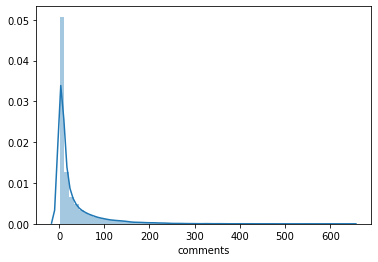

In [17]:
#Plotting histogram for the number of reviews. Most of the listings have reviews between 1-10
sns.distplot(review_cnt.comments, bins = 60)

In [58]:
#Lets take a look at an example review
review_df['comments'][100]

"L'appartement est tel que décrit , propre et agréable. Pas très loin du métro , dans un quartier tranquille .\nLa chambre est assez spacieuse pour trois personnes, la cuisine fonctionnelle, la salle de bain également ( Lisa a même pensé aux brosses à dents!!)\nNotre hôte, LisaRoxane a été charmante, discrète et accommodante pour notre départ tardif.nous avons pu laisser nos bagages et nous changer avant de prendre un taxi pour JFK.\nTout était très bien, nous avons passé un excellent sejour!\n"

In [50]:
review_df.shape

(1142464, 6)

### 3. Cleaning reviews

In [19]:
#Reviews cleanup : tokenize, lowercase, remove punctuation marks, and stop-words
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = list()

lines = review_df['comments'].values.tolist()

for line in lines:
    #Create tokens from sentence
    tokens = word_tokenize(line)
    
    #Converting all the tokens into lowercase
    tokens = [w.lower() for w in tokens]
    
    #Remove punctuation mark from each word
    table = str.maketrans("","",string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    #Remove tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    #Filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    #append words to list
    review_lines.append(words)

In [20]:
#Number of reviews in our data after all the pre-processing
print(len(review_lines))

1142464


In [49]:
#Review before preprocessing
print(review_df['comments'][20])

The Midtown Castle was a great choice for our weekend stay. It is centrally located, and walking distance for most of our stops. The apartment was clean, nicely decorated, and the perfect size for our trip. Jennifer was a great host, and made our self check-in very easy! She gave us all of the information we needed for a smooth trip.  I would highly recommend this place to other visitors, and would consider staying there again when we are back in NYC!


In [48]:
#Review after preprocessing
print(review_lines[20])

['midtown', 'castle', 'great', 'choice', 'weekend', 'stay', 'centrally', 'located', 'walking', 'distance', 'stops', 'apartment', 'clean', 'nicely', 'decorated', 'perfect', 'size', 'trip', 'jennifer', 'great', 'host', 'made', 'self', 'checkin', 'easy', 'gave', 'us', 'information', 'needed', 'smooth', 'trip', 'would', 'highly', 'recommend', 'place', 'visitors', 'would', 'consider', 'staying', 'back', 'nyc']


### 4. Training word2vec

In [21]:
#Size of vector and window for word2vec
EMBEDDING_SIZE =100
WINDOW_SIZE = 5

In [22]:
#Training a word2vec model on our cleaned dataset which is a list of words
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=review_lines, size=EMBEDDING_SIZE, window=WINDOW_SIZE, sg=1, hs=0, min_count=3,workers = 4, seed=4) 

In [23]:
#min_count : ignore all words with total frequency lower than this
#workers – Use these many worker threads to train the model (=faster training with multicore machines)
#sg – Training algorithm: 1 for skip-gram; otherwise CBOW.
#hs – If 1, hierarchical softmax will be used for model training. If 0, negative sampling will be used
#seed – Seed for the random number generator. Initial vectors for each word are seeded with a hash of the concatenation of word + str(seed).

In [52]:
#Vector dimension for each word
model_w2v.vector_size

100

In [55]:
#Number of unique words
len(model_w2v.wv.vocab)

94416

### 5. Model saving and loading

In [24]:
#Save the trained model
model_w2v.save('airbnb_model.model')

In [25]:
#load the model trained on our corpus
model_saved = Word2Vec.load('airbnb_model.model')

### 6. Result

In [26]:
#Printing the vocabulary 
vocab = list(model_w2v.wv.vocab)
print(vocab[50:100])

['difficile', 'si', 'pas', 'habitué', 'jennifer', 'correcte', 'remboursement', 'caution', 'était', 'rapide', 'part', 'ces', 'détails', 'court', 'passé', 'jai', 'possibilité', 'revenir', 'sur', 'vacances', 'je', 'reprendrai', 'à', 'midtown', 'castle', 'jean', 'possession', 'ile', 'réunion', 'great', 'experience', 'stayed', 'friend', 'six', 'days', 'lovely', 'place', 'big', 'spacious', 'room', 'roof', 'really', 'makes', 'feel', 'like', 'staying', 'location', 'perfect', 'steps', 'macy']


In [27]:
#Vector size for each word
model_w2v.vector_size

100

In [28]:
#Vector for word "room"
model_w2v.wv['spacious']

array([-0.08653334, -0.6106071 , -0.41853306,  0.03007984,  0.01005792,
        0.33923474,  0.5310961 , -0.3685299 , -0.03650644, -0.2798122 ,
       -0.3607964 ,  0.11349513,  0.10972715,  0.17226698, -0.4610637 ,
        0.11351141,  0.15219958, -0.4055845 , -0.03373929, -0.08265369,
       -0.06079018, -0.06560601, -0.10936774,  0.24907511,  0.0087022 ,
       -0.09687304, -0.25126177,  0.2638443 ,  0.3671965 ,  0.4852466 ,
       -0.14594021, -0.00806846, -0.08359358,  0.13623747, -0.74597895,
       -0.45576113,  0.09269127,  0.11170986,  0.04807548, -0.00952091,
        0.08763056,  0.00583201,  0.21537836,  0.1945478 ,  0.07388721,
        0.08248948,  0.17196006,  0.05941069, -0.47340366,  0.23086719,
       -0.17785998, -0.07067276, -0.03502363,  0.17770194,  0.009686  ,
       -0.08309583,  0.2729562 ,  0.5033552 ,  0.11067104,  0.2742271 ,
        0.13204831,  0.29559165, -0.05023228, -0.5231171 ,  0.24047068,
       -0.14184578, -0.32505193,  0.29703274,  0.34943336,  0.16

In [65]:
#Search query
search_query = 'airbnb'
topn = 15
#Example : wonderful, safe, canceled, bad, posh, house, friend, unpleasant

#### Calculating similarity using most_similar method

##### most_similar( ) : Find the top-N most similar words. This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.

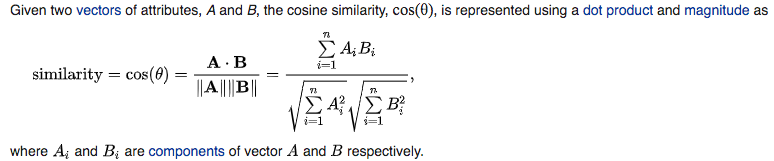

In [66]:
#most_similar words for a given query
model_w2v.wv.most_similar(search_query, topn = 10)

[('abnb', 0.8496731519699097),
 ('bnb', 0.8200206756591797),
 ('aribnb', 0.8152755498886108),
 ('airnb', 0.8113374710083008),
 ('airbnd', 0.7901395559310913),
 ('aibnb', 0.7798537015914917),
 ('airnbnb', 0.7775635123252869),
 ('arbnb', 0.7751783132553101),
 ('airb', 0.7665168046951294),
 ('abb', 0.7652177810668945)]

In [31]:
#Using saved model
#model_saved.wv.most_similar(search_query, topn = topn)

In [32]:
#example for doesnt match
model_saved.wv.doesnt_match(['comfotable','cozy','dirty','clean','safe','nice'])

/Users/ramya.gowda/miniconda3/envs/tensorflow/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'dirty'

In [64]:
model_saved.wv.doesnt_match(['mother','sister','aunt','daughter'])

/Users/ramya.gowda/miniconda3/envs/tensorflow/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'daughter'

### Using pre-trained model

In [35]:
#Use pretrained model - 
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('pretrained-model/GoogleNews-vectors-negative300.bin', binary=True)

In [37]:
model.vector_size

300

In [38]:
len(model.vocab)

3000000

In [39]:
vocab_list = list(model.vocab.keys())

In [68]:
model.most_similar('mouse')

[('Logitech_MX_Revolution', 0.6175231337547302),
 ('Razer_Mamba', 0.5994571447372437),
 ('mice', 0.5896885395050049),
 ('cordless_laser', 0.5652030110359192),
 ('VX_Nano', 0.5619357824325562),
 ('Logitech_MX###', 0.5604779720306396),
 ('keyboard_arrow_keys', 0.5545550584793091),
 ('Logitech_G9x', 0.5538492202758789),
 ('NOTE_TO_READERS_Hovering', 0.5520267486572266),
 ('Razer_Abyssus', 0.5489388704299927)]

### review search

In [41]:
term = 'mouse'

In [42]:
neg_reviews = review_df.comments.loc[review_df['comments'].str.contains(term)].reset_index()

In [43]:
neg_reviews.comments.iloc[4]

"all in all a nice apartment. good space. nothing really to do around the neighborhood. the subway is about 15 minutes walk. Manhattan is about 30 minutes ride. nichelle's friend came to let us in.  she was nice and gave us some recommendations.  we didn't see nichelle the whole time until the check out. our flight back home was only at 6pm.  check out was at 11 am, she let us stay until 12 , and then we had to wait in the street for a taxi.   we had a mouse in the apartment."